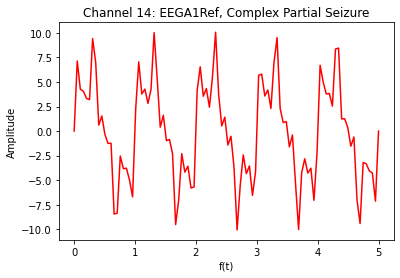

In [288]:
import numpy as np
import matplotlib.pyplot as plt

sr = 100
periods = 5
t = np.linspace(0, periods, sr)
freq1 = 1
freq2 = 4
freq3 = 7
freq4 = 3

s = 6*np.sin(2*np.pi*freq1*t) + 3*np.sin(2*np.pi*freq2*t) + 2*np.sin(2*np.pi*freq3*t)+1*np.sin(2*np.pi*freq4*t)                

plt.title('Channel 14: EEGA1Ref, Complex Partial Seizure')
plt.ylabel("Amplitude")
plt.xlabel("f(t)")
plt.plot(t, s, 'r')
plt.show()

100


Text(0.5, 1.0, 'Discrete Fourier Transform from Linear Algebra Method')

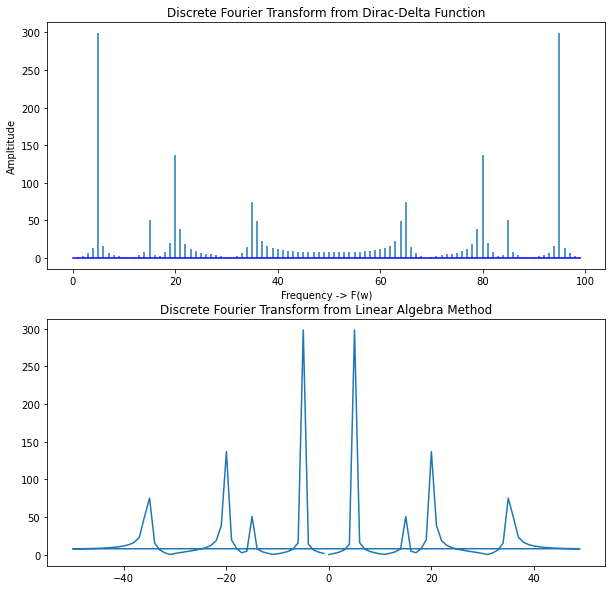

In [303]:
from scipy.fft import fft, fftfreq

def discrete_ft(x, sr_d):
    #initial variables
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp((-2j * np.pi * k * n)/ N)
    freq = n/(N/sr_d)
    
    return np.dot(M, x), np.fft.fft(x), freq
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

discrete_a, fourier_a, freq = discrete_ft(s, sr)
axs[0].set_xlabel('Frequency -> F(w)')
axs[0].set_ylabel('Ampltitude')
axs[0].set_title('Discrete Fourier Transform from Dirac-Delta Function')
axs[0].stem(freq, abs(discrete_a), markerfmt=" ", basefmt="-b")

N = sr
print(N)
yf = fft(s)
xf = fftfreq(N, 1/sr)
axs[1].plot(xf, np.abs(yf))
axs[1].set_title('Discrete Fourier Transform from Linear Algebra Method')


[ 50.58176414  74.96565693 136.73824503 298.40499536]
[15.0, 35.0, 20.0, 5.0]


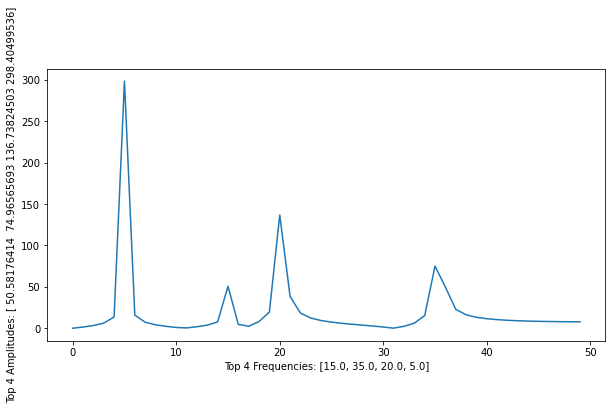

In [334]:
y_check = abs(yf[:N//2])

a = abs(y_check)
a.sort()
print(a[-4:])

get_indices = [list(y_check).index(y) for y in a[-4:]]
print([xf[i] for i in get_indices])

plt.rcParams["figure.figsize"] = (10,5)
plt.xlabel(f'Top 4 Frequencies: {[xf[i] for i in get_indices]}')
plt.ylabel(f'Top 4 Amplitudes: {a[-4:]}')
plt.plot(xf[:N//2], np.abs(y_check))


/var/folders/q6/c9ls7y117c383dxbpmvcj56h0000gn/T/ipykernel_58598/3287981609.py:2: RuntimeWarning: invalid value encountered in true_divide
  g = s/p


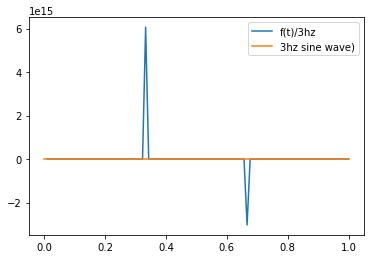

In [34]:
p = 1*np.sin(2*np.pi*freq4*t)
g = s/p
plt.plot(t, g)
plt.plot(t, p)
plt.legend(["f(t)/3hz", "3hz sine wave)"])

51
[1, 3, 4, 7, 8, 5, 9, 10, 11, 12, 13, 14, 15, 16, 6, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 2, 0]
[149.92321053303968, 50.43476516452787, 47.43443821754292, 22.81724545173055, 3.5236478439121686, 3.2205597411496405, 2.3191187441785064, 1.8448184435549795, 1.567205030700632, 1.377406816074778, 1.2365926116539236, 1.1267380363043549, 1.0380709633604723, 0.9647232948732746, 0.9357844222578685, 0.9029077328868009, 0.8500455397772679, 0.8043069230246203, 0.7643502867794749, 0.7291654342160423, 0.6979747343628147, 0.6701683586200256, 0.6452604375709723, 0.6228585465672579, 0.6026419554882082, 0.5843458006486436, 0.5677493549480649, 0.5526671942937322, 0.5389424494246514, 0.5264415845931394, 0.5150503111319256, 0.5046703561854138, 0.49521688393400115, 0.48661642043979203, 0.478805171391589, 0.4717276494478457, 0.4653355478702631, 0.4595868118734984, 0.45444487011894386, 0.4498779970609698, 0.44

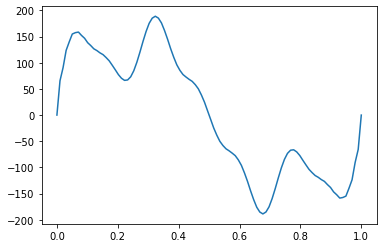

In [281]:
get_top = lambda x: [np.argsort(x)[::-1][:100]]

symmetry_point = int(len(abs(discrete_a))/2)+1
print(symmetry_point)
component_freqs = [i for x, i in enumerate(get_top(abs(discrete_a))[0]) if i < symmetry_point] #get only one half of symmetry
component_amps = [abs(discrete_a)[i] for i in component_freqs]

print(component_freqs)
print(component_amps)

reform_x = 0
for i, j in enumerate(component_freqs):
    reform_x += component_amps[i]*np.sin(2*np.pi*j*t)
plt.plot(t, reform_x)

(779,)
(779, 19, 500)
Normal, No Seizure Blue


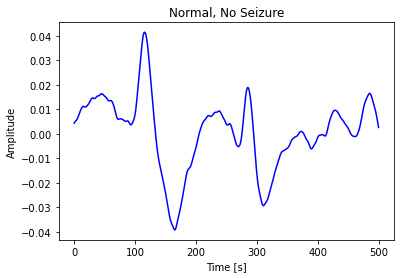

In [261]:
#1: Complex Partial Seizure
#2: Electrographic Seizure
#0: Normal, No Seizure

#19 channels represent different electrode locations on brain

p = 9

sr_eeg = 500
periods_eeg = 500
t = np.linspace(0, periods_eeg, sr_eeg)

key = {1: 'Complex Partial Seizure', 2: 'Electrographic Seizure', 0: 'Normal, No Seizure'}

X = np.load('data/x_test.npy')
Y = np.load('data/y_test.npy')

print(Y.shape)
print(X.shape)

print(key[Y[p]], 'Blue')

plt.title(key[Y[p]])
plt.ylabel("Amplitude")
plt.xlabel("Time [s]")
plt.plot(t, X[p][15], 'b')

In [398]:
print(len(Y))

779


500


/Users/devpatelio/miniconda3/envs/machine_learning/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/devpatelio/miniconda3/envs/machine_learning/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/devpatelio/miniconda3/envs/machine_learning/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/devpatelio/miniconda3/envs/machine_learning/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/devpatelio/miniconda3/envs/machine_learning/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWar

Text(0.5, 1.0, 'Reconstructed Signal from Fourier Transform Power Series')

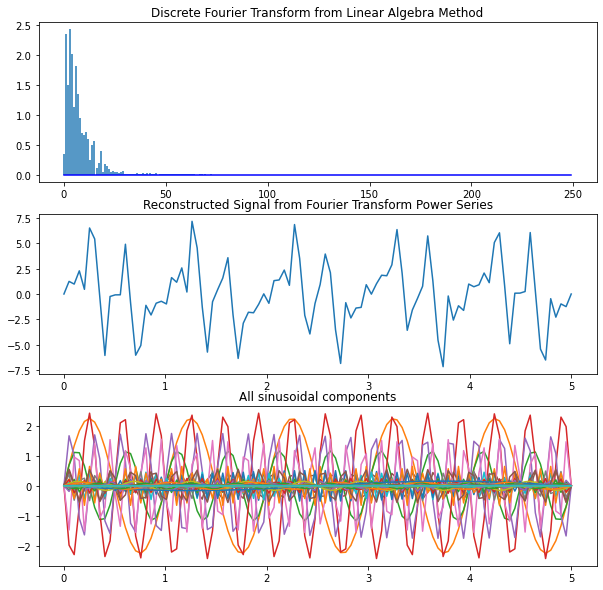

In [355]:
N = sr_eeg
print(N)
yf = fft(X[p][15])
xf = fftfreq(N, 1/sr_eeg)
fig, axs = plt.subplots(3, 1, figsize=(10, 10))
curve = axs[0].stem(xf[:N//2], np.abs(yf[:N//2]), markerfmt=" ", basefmt="-b")
axs[0].set_title('Discrete Fourier Transform from Linear Algebra Method')

xf = xf[:N//2]
yf = yf[:N//2]

reform_x = 0
for i, j in enumerate(xf):
    reform_x += yf[i]*np.sin(2*np.pi*j*t)
    axs[2].plot(t, yf[i]*np.sin(2*np.pi*j*t))
    axs[2].set_title('All sinusoidal components')
axs[1].plot(t, reform_x)
axs[1].set_title('Reconstructed Signal from Fourier Transform Power Series')

0.004044502412640158 + 0.010961871702351009·x¹ + 0.4811077155512839·x² -
2.740556741744359·x³ - 31.074519312182673·x⁴ + 71.51235897602511·x⁵ +
403.3055993323198·x⁶ - 669.5208183502574·x⁷ - 2375.4918480726756·x⁸ +
3092.751297098333·x⁹ + 7816.237239438228·x¹⁰ - 8038.948880406009·x¹¹ -
15579.100153617173·x¹² + 12360.19237819976·x¹³ + 19261.221313393544·x¹⁴ -
11169.154677000819·x¹⁵ - 14454.467559130515·x¹⁶ + 5488.772905876945·x¹⁷ +
6034.628748548969·x¹⁸ - 1132.8802922420625·x¹⁹ - 1075.7400814786786·x²⁰


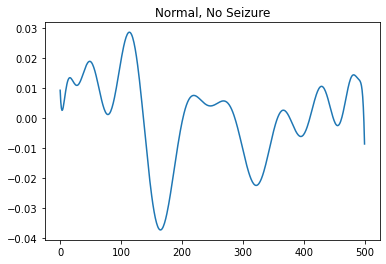

In [280]:
##Getting approximate function for integration (manual)

from numpy.polynomial import Polynomial as p_fit
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

plt.title(key[Y[p]])
poly = p_fit.fit([i for i in range(500)], X[p][15], 20)
p_x = np.linspace(0, 500, 500)
p_y = poly(p_x)
plt.plot(p_x, p_y)

print(poly)

In [278]:
coef = []
for i in poly:
    coef.append(round(i, 1))
print(coef)

[0.0, 0.0, 0.5, -2.7, -31.1, 71.5, 403.3, -669.5, -2375.5, 3092.8, 7816.2, -8038.9, -15579.1, 12360.2, 19261.2, -11169.2, -14454.5, 5488.8, 6034.6, -1132.9, -1075.7]


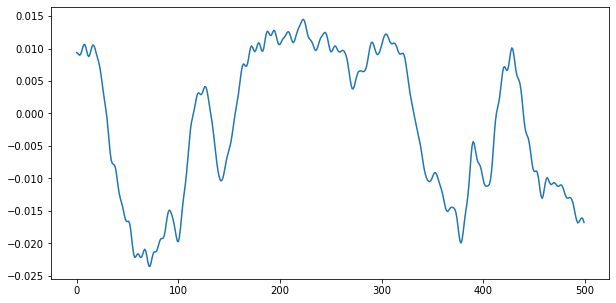

In [360]:
plt.plot([i for i in range(500)], X[707][0])

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158

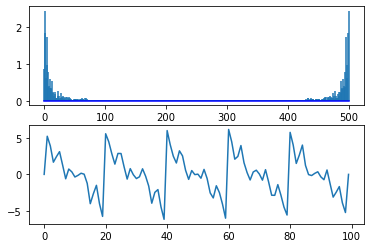

In [358]:
fig, axs = plt.subplots(2, 1, figsize=(6, 4))
discrete_eeg, fourier_eeg, freq_eeg = discrete_ft(X[707][0], sr_eeg)
axs[0].stem(freq_eeg, abs(fourier_eeg), markerfmt=" ", basefmt="-b")

symmetry_point_eeg = int(len(abs(fourier_eeg))/2)+1
component_amps_eeg = [i for x, i in enumerate(abs(fourier_eeg)) if x < symmetry_point_eeg]
component_freqs_eeg = [i for x, i in enumerate(freq_eeg) if x < symmetry_point_eeg]

print(component_freqs_eeg)
reform_x_eeg = 0
for i in range(len(component_freqs_eeg)):
    reform_x_eeg += component_amps_eeg[i]*np.sin(2*np.pi*component_freqs_eeg[i]*t)
plt.plot([i for i in range(100)], reform_x_eeg)

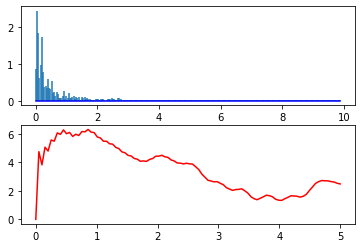

In [361]:

fft_base = np.fft.fft(X[707][0])
T_sampling_interval = t[1] - t[0]
N = X[707][0].shape[0]
f = np.linspace(0, 1/T_sampling_interval, N)

fig, axs = plt.subplots(2, 1, figsize=(6, 4))
axs[0].stem(f[:N // 2], abs(fft_base)[:N // 2], markerfmt=" ", basefmt="-b") 

all_freqs = f[:N // 2]
all_amps = abs(fft_base)[:N // 2]

x_fft = 0
for i, j in enumerate(all_freqs):
    x_fft += all_amps[i]*np.sin(2*np.pi*j*t)

axs[1].plot(t, x_fft, 'r')

# plt.bar(f[:N // 2], abs(fft)[:N // 2], width=1.5)  # 1 / N is a normalization factor
# print(abs(fft)[:N // 2])

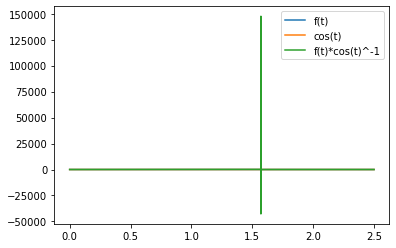

In [120]:
periods_new = 2.5
sr_new = 100000
t_new = np.linspace(0, periods_new, sr_new)

a = (1*np.cos(2*np.pi*t_new*1 - np.pi/2) + 2*np.cos(4*np.pi*t_new))
b = np.cos(t_new)

plt.plot(t_new, a)
plt.plot(t_new, b)
plt.plot(t_new, a/b)

plt.legend(["f(t)", "cos(t)", "f(t)*cos(t)^-1"])


In [121]:
i = [0/4, 1/4, 2/4, 3/4]
for d in i:
    print(f'n={d}, f(n)={(1*np.cos(2*np.pi*d*1 - np.pi/2) + 2*np.cos(4*np.pi*d))}')


n=0.0, f(n)=2.0
n=0.25, f(n)=-1.0
n=0.5, f(n)=2.0
n=0.75, f(n)=-3.0


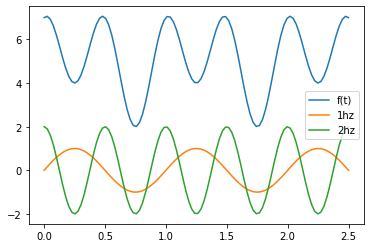

In [122]:
sr = 100
periods = 2.5
t = np.linspace(0, periods, sr)
f_t = 5+(1*np.cos(2*np.pi*t*1 - np.pi/2) + 2*np.cos(4*np.pi*t))
plt.plot(t, f_t)
plt.plot(t, 1*np.cos(2*np.pi*t*1 - np.pi/2))
plt.plot(t, 2*np.cos(4*np.pi*t))
plt.legend(["f(t)", "1hz", "2hz"])

[5.14578616e+02 1.69968162e+01 3.60949514e+01 2.74481494e+01
 2.96174555e+00 9.58004719e+01 7.52482530e+00 4.02045175e+00
 2.68828433e+00 1.96705638e+00 1.51549783e+00 1.20855943e+00
 9.88287258e-01 8.23887741e-01 6.97447765e-01 5.97846078e-01
 5.17827957e-01 4.52472080e-01 3.98331832e-01 3.52928327e-01
 3.14437946e-01 2.81492714e-01 2.53048834e-01 2.28297806e-01
 2.06604938e-01 1.87465946e-01 1.70475770e-01 1.55305793e-01
 1.41686967e-01 1.29397145e-01 1.18251448e-01 1.08094872e-01
 9.87965428e-02 9.02452153e-02 8.23457152e-02 7.50161014e-02
 6.81853842e-02 6.17916779e-02 5.57806927e-02 5.01044944e-02
 4.47204772e-02 3.95905064e-02 3.46801964e-02 2.99582983e-02
 2.53961748e-02 2.09673458e-02 1.66470897e-02 1.24120897e-02
 8.24011446e-03 4.10972483e-03 8.35553472e-16 4.10972483e-03
 8.24011446e-03 1.24120897e-02 1.66470897e-02 2.09673458e-02
 2.53961748e-02 2.99582983e-02 3.46801964e-02 3.95905064e-02
 4.47204772e-02 5.01044944e-02 5.57806927e-02 6.17916779e-02
 6.81853842e-02 7.501610

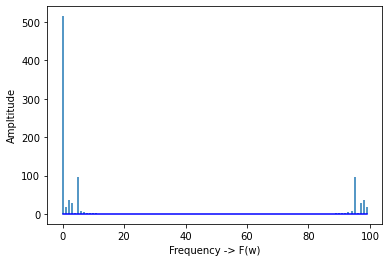

In [210]:
discrete_ex, fourier_ex, freq_ex = discrete_ft(f_t, sr)
plt.xlabel('Frequency -> F(w)')
plt.ylabel('Ampltitude')
plt.stem(freq_ex, abs(fourier_ex), markerfmt=" ", basefmt="-b")

print(abs(fourier_ex))

{1: [2, 3, 4, 8, 10, 13, 16, 19, 28, 29, 32, 34, 35, 38, 40, 44, 46, 48, 50, 52, 53, 60, 61, 64, 65, 69, 70, 73, 75, 78, 80, 82, 83, 85, 87, 95, 96, 98, 100, 101, 103, 104, 106, 109, 111, 113, 116, 117, 121, 124, 126, 132, 133, 135, 138, 139, 140, 144, 147, 152, 153, 154, 155, 156, 160, 161, 163, 168, 173, 177, 179, 180, 185, 186, 195, 199, 200, 203, 204, 206, 208, 211, 215, 220, 222, 227, 233, 234, 238, 240, 243, 252, 254, 255, 257, 259, 262, 264, 271, 272, 277, 278, 280, 282, 288, 289, 290, 293, 294, 295, 296, 297, 298, 306, 312, 313, 315, 318, 323, 325, 326, 327, 343, 344, 346, 347, 351, 352, 353, 367, 368, 369, 370, 371, 373, 377, 380, 382, 383, 385, 388, 395, 398, 400, 402, 404, 405, 407, 408, 413, 416, 418, 419, 424, 425, 428, 430, 432, 436, 437, 439, 442, 444, 445, 446, 453, 454, 455, 459, 460, 462, 463, 469, 476, 477, 484, 486, 488, 491, 492, 493, 494, 495, 499, 502, 503, 508, 511, 514, 515, 516, 518, 519, 521, 524, 525, 529, 530, 531, 537, 538, 539, 543, 544, 545, 549, 550, 55

IndexError: index 19 is out of bounds for axis 0 with size 19

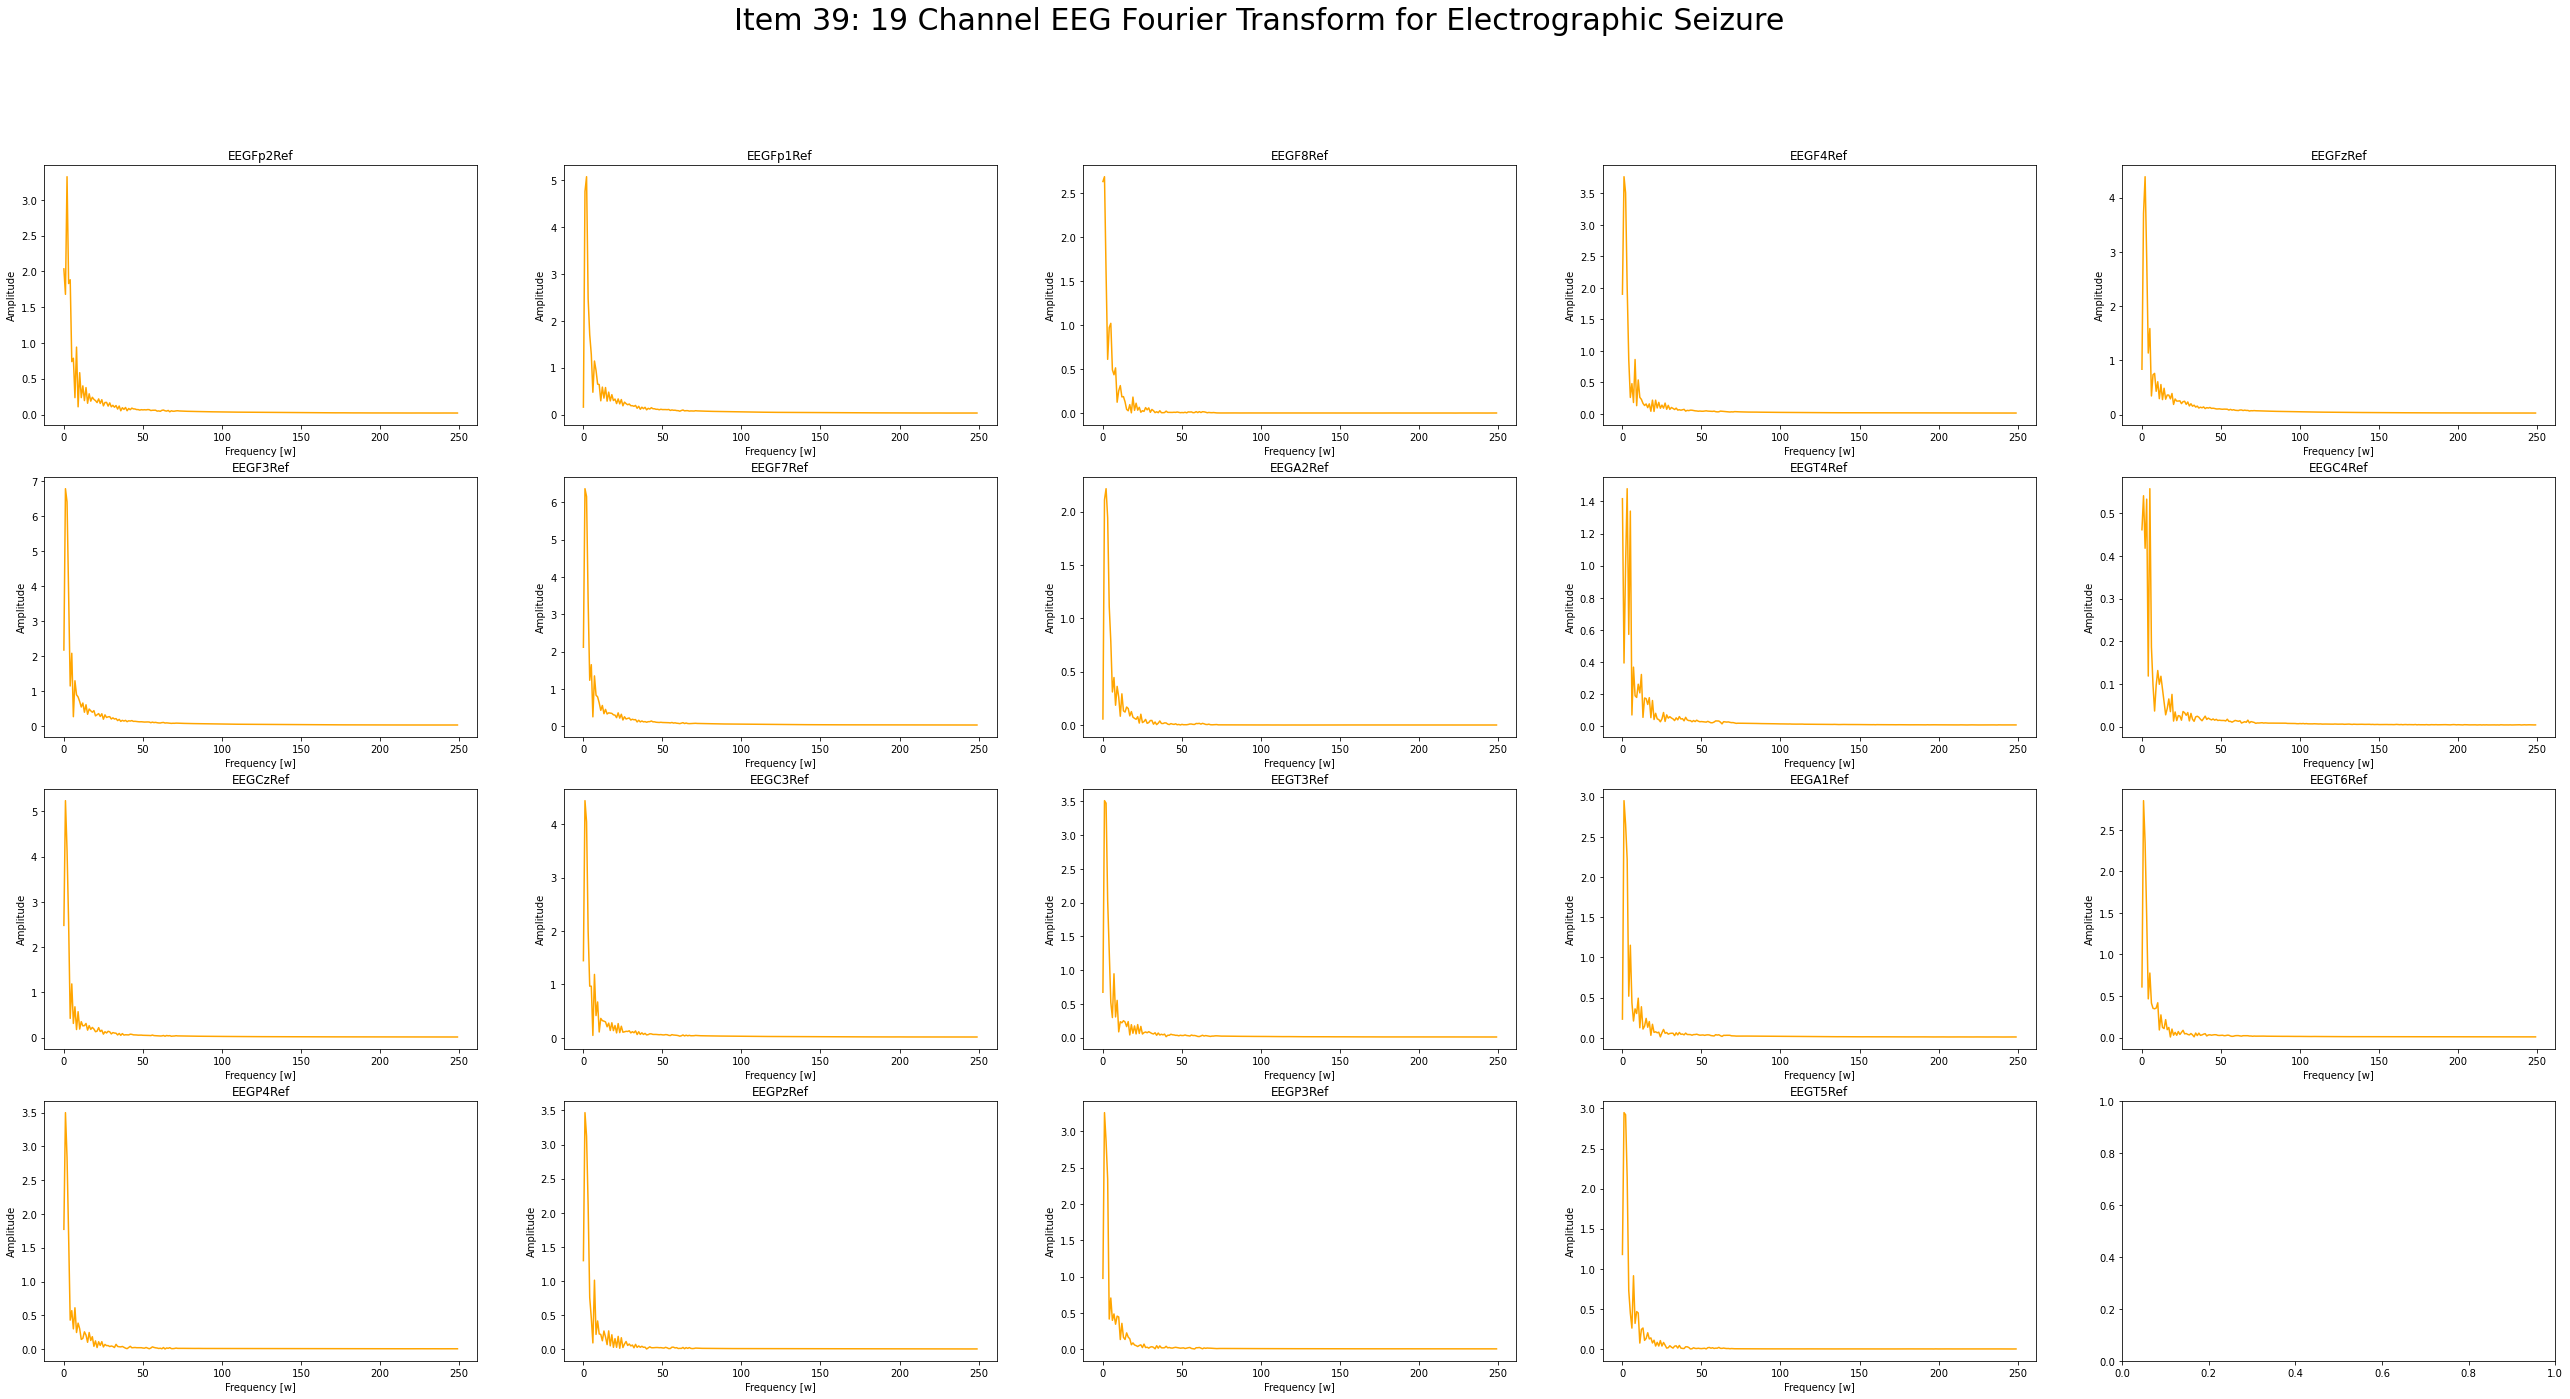

In [394]:


idx = 39
names = ['EEGFp2Ref', 'EEGFp1Ref', 'EEGF8Ref', 'EEGF4Ref', 'EEGFzRef', 'EEGF3Ref', 'EEGF7Ref', 'EEGA2Ref', 'EEGT4Ref', 'EEGC4Ref', 'EEGCzRef', 'EEGC3Ref', 'EEGT3Ref', 'EEGA1Ref', 'EEGT6Ref', 'EEGP4Ref', 'EEGPzRef', 'EEGP3Ref', 'EEGT5Ref', 'EEGO2Ref', 'EEGO1Ref', 'ECGEKG', 'Manual', 'EDFAnnotations']

electrode_ref = {i: names[i] for i in range(len(names))}
search_key = {1: [], 2: [], 0: []}
for x, i in enumerate(Y):
    try:
        search_key[i].append(x)
    except:
        pass
        # print(f"{x} is not found")
# print(search_key)

fig, axs = plt.subplots(int(len(names)/6), 5, figsize=(45, 22))
fig.suptitle( f"Item {idx}: 19 Channel EEG Fourier Transform for {key[Y[idx]]}", fontsize=30)

idx_pairs = [(i, x) for i in range(6) for x in range(5)]
# print(idx_pairs)
print(search_key)
t_check = np.linspace(0, 1, 500)

for i in range(len(names)):
    discrete_ex, fourier_ex, freq_ex = discrete_ft(X[12][i], 500)
    _, fourier_ex_2, freq_ex_2 = discrete_ft(X[3][i], 500)
    _, fourier_ex_3, freq_ex_3 = discrete_ft(X[39][i], 500)
    # axs[idx_pairs[i][0], idx_pairs[i][1]].plot([i for i in range(500)][:N//2][:25], abs(fourier_ex[:N//2]), 'blue')
    # axs[idx_pairs[i][0], idx_pairs[i][1]].plot([i for i in range(500)][:N//2], abs(fourier_ex_2[:N//2]), 'red')
    axs[idx_pairs[i][0], idx_pairs[i][1]].plot([i for i in range(500)][:N//2], abs(fourier_ex_3[:N//2]), 'orange')

    axs[idx_pairs[i][0], idx_pairs[i][1]].set_title(names[i])
    axs[idx_pairs[i][0], idx_pairs[i][1]].set(xlabel="Frequency [w]", ylabel="Amplitude")


    # axs.set(ylabel=names[i])
# plt.plot(t, X[idx][18])
# print(key[Y[idx]])

In [418]:
import pandas as pd
Y_new = np.load('data/y_test.npy')

frequency_table = pd.DataFrame(columns=["Frequency", "Amplitude_1 (Basis)", "Amplitude_2 (Complex Partial)", "Amplitude_3 (Electrographic Seizure)", "A1-A2", "A1-A3"])
frequency_table["Frequency"] = freq_ex[:N//2][:25]
frequency_table["Amplitude_1 (Basis)"] = abs(fourier_ex[:N//2])[:25]
frequency_table["Amplitude_2 (Complex Partial)"] = abs(fourier_ex_2[:N//2])[:25]
frequency_table["Amplitude_3 (Electrographic Seizure)"] = abs(fourier_ex_3[:N//2])[:25]

all_1 = abs(fourier_ex[:N//2])[:25]
all_2 = abs(fourier_ex_2[:N//2])[:25]
all_3 = abs(fourier_ex_3[:N//2])[:25]
frequency_table["A1-A2"] = all_1-all_2
frequency_table["A1-A3"] = all_1-all_3

frequency_table

print(sum(frequency_table["A1-A2"].tolist())/len(frequency_table["A1-A2"].tolist()))
print(sum(frequency_table["A1-A3"].tolist())/len(frequency_table["A1-A3"].tolist()))



-0.6152813199151486
-0.2844650029681734


In [170]:
print(electrode_ref)

{0: 'EEGFp2Ref', 1: 'EEGFp1Ref', 2: 'EEGF8Ref', 3: 'EEGF4Ref', 4: 'EEGFzRef', 5: 'EEGF3Ref', 6: 'EEGF7Ref', 7: 'EEGA2Ref', 8: 'EEGT4Ref', 9: 'EEGC4Ref', 10: 'EEGCzRef', 11: 'EEGC3Ref', 12: 'EEGT3Ref', 13: 'EEGA1Ref', 14: 'EEGT6Ref', 15: 'EEGP4Ref', 16: 'EEGPzRef', 17: 'EEGP3Ref', 18: 'EEGT5Ref', 19: 'EEGO2Ref', 20: 'EEGO1Ref', 21: 'ECGEKG', 22: 'Manual', 23: 'EDFAnnotations'}


{1: [2, 3, 4, 8, 10, 13, 16, 19, 28, 29, 32, 34, 35, 38, 40, 44, 46, 48, 50, 52, 53, 60, 61, 64, 65, 69, 70, 73, 75, 78, 80, 82, 83, 85, 87, 95, 96, 98, 100, 101, 103, 104, 106, 109, 111, 113, 116, 117, 121, 124, 126, 132, 133, 135, 138, 139, 140, 144, 147, 152, 153, 154, 155, 156, 160, 161, 163, 168, 173, 177, 179, 180, 185, 186, 195, 199, 200, 203, 204, 206, 208, 211, 215, 220, 222, 227, 233, 234, 238, 240, 243, 252, 254, 255, 257, 259, 262, 264, 271, 272, 277, 278, 280, 282, 288, 289, 290, 293, 294, 295, 296, 297, 298, 306, 312, 313, 315, 318, 323, 325, 326, 327, 343, 344, 346, 347, 351, 352, 353, 367, 368, 369, 370, 371, 373, 377, 380, 382, 383, 385, 388, 395, 398, 400, 402, 404, 405, 407, 408, 413, 416, 418, 419, 424, 425, 428, 430, 432, 436, 437, 439, 442, 444, 445, 446, 453, 454, 455, 459, 460, 462, 463, 469, 476, 477, 484, 486, 488, 491, 492, 493, 494, 495, 499, 502, 503, 508, 511, 514, 515, 516, 518, 519, 521, 524, 525, 529, 530, 531, 537, 538, 539, 543, 544, 545, 549, 550, 55

IndexError: index 19 is out of bounds for axis 0 with size 19

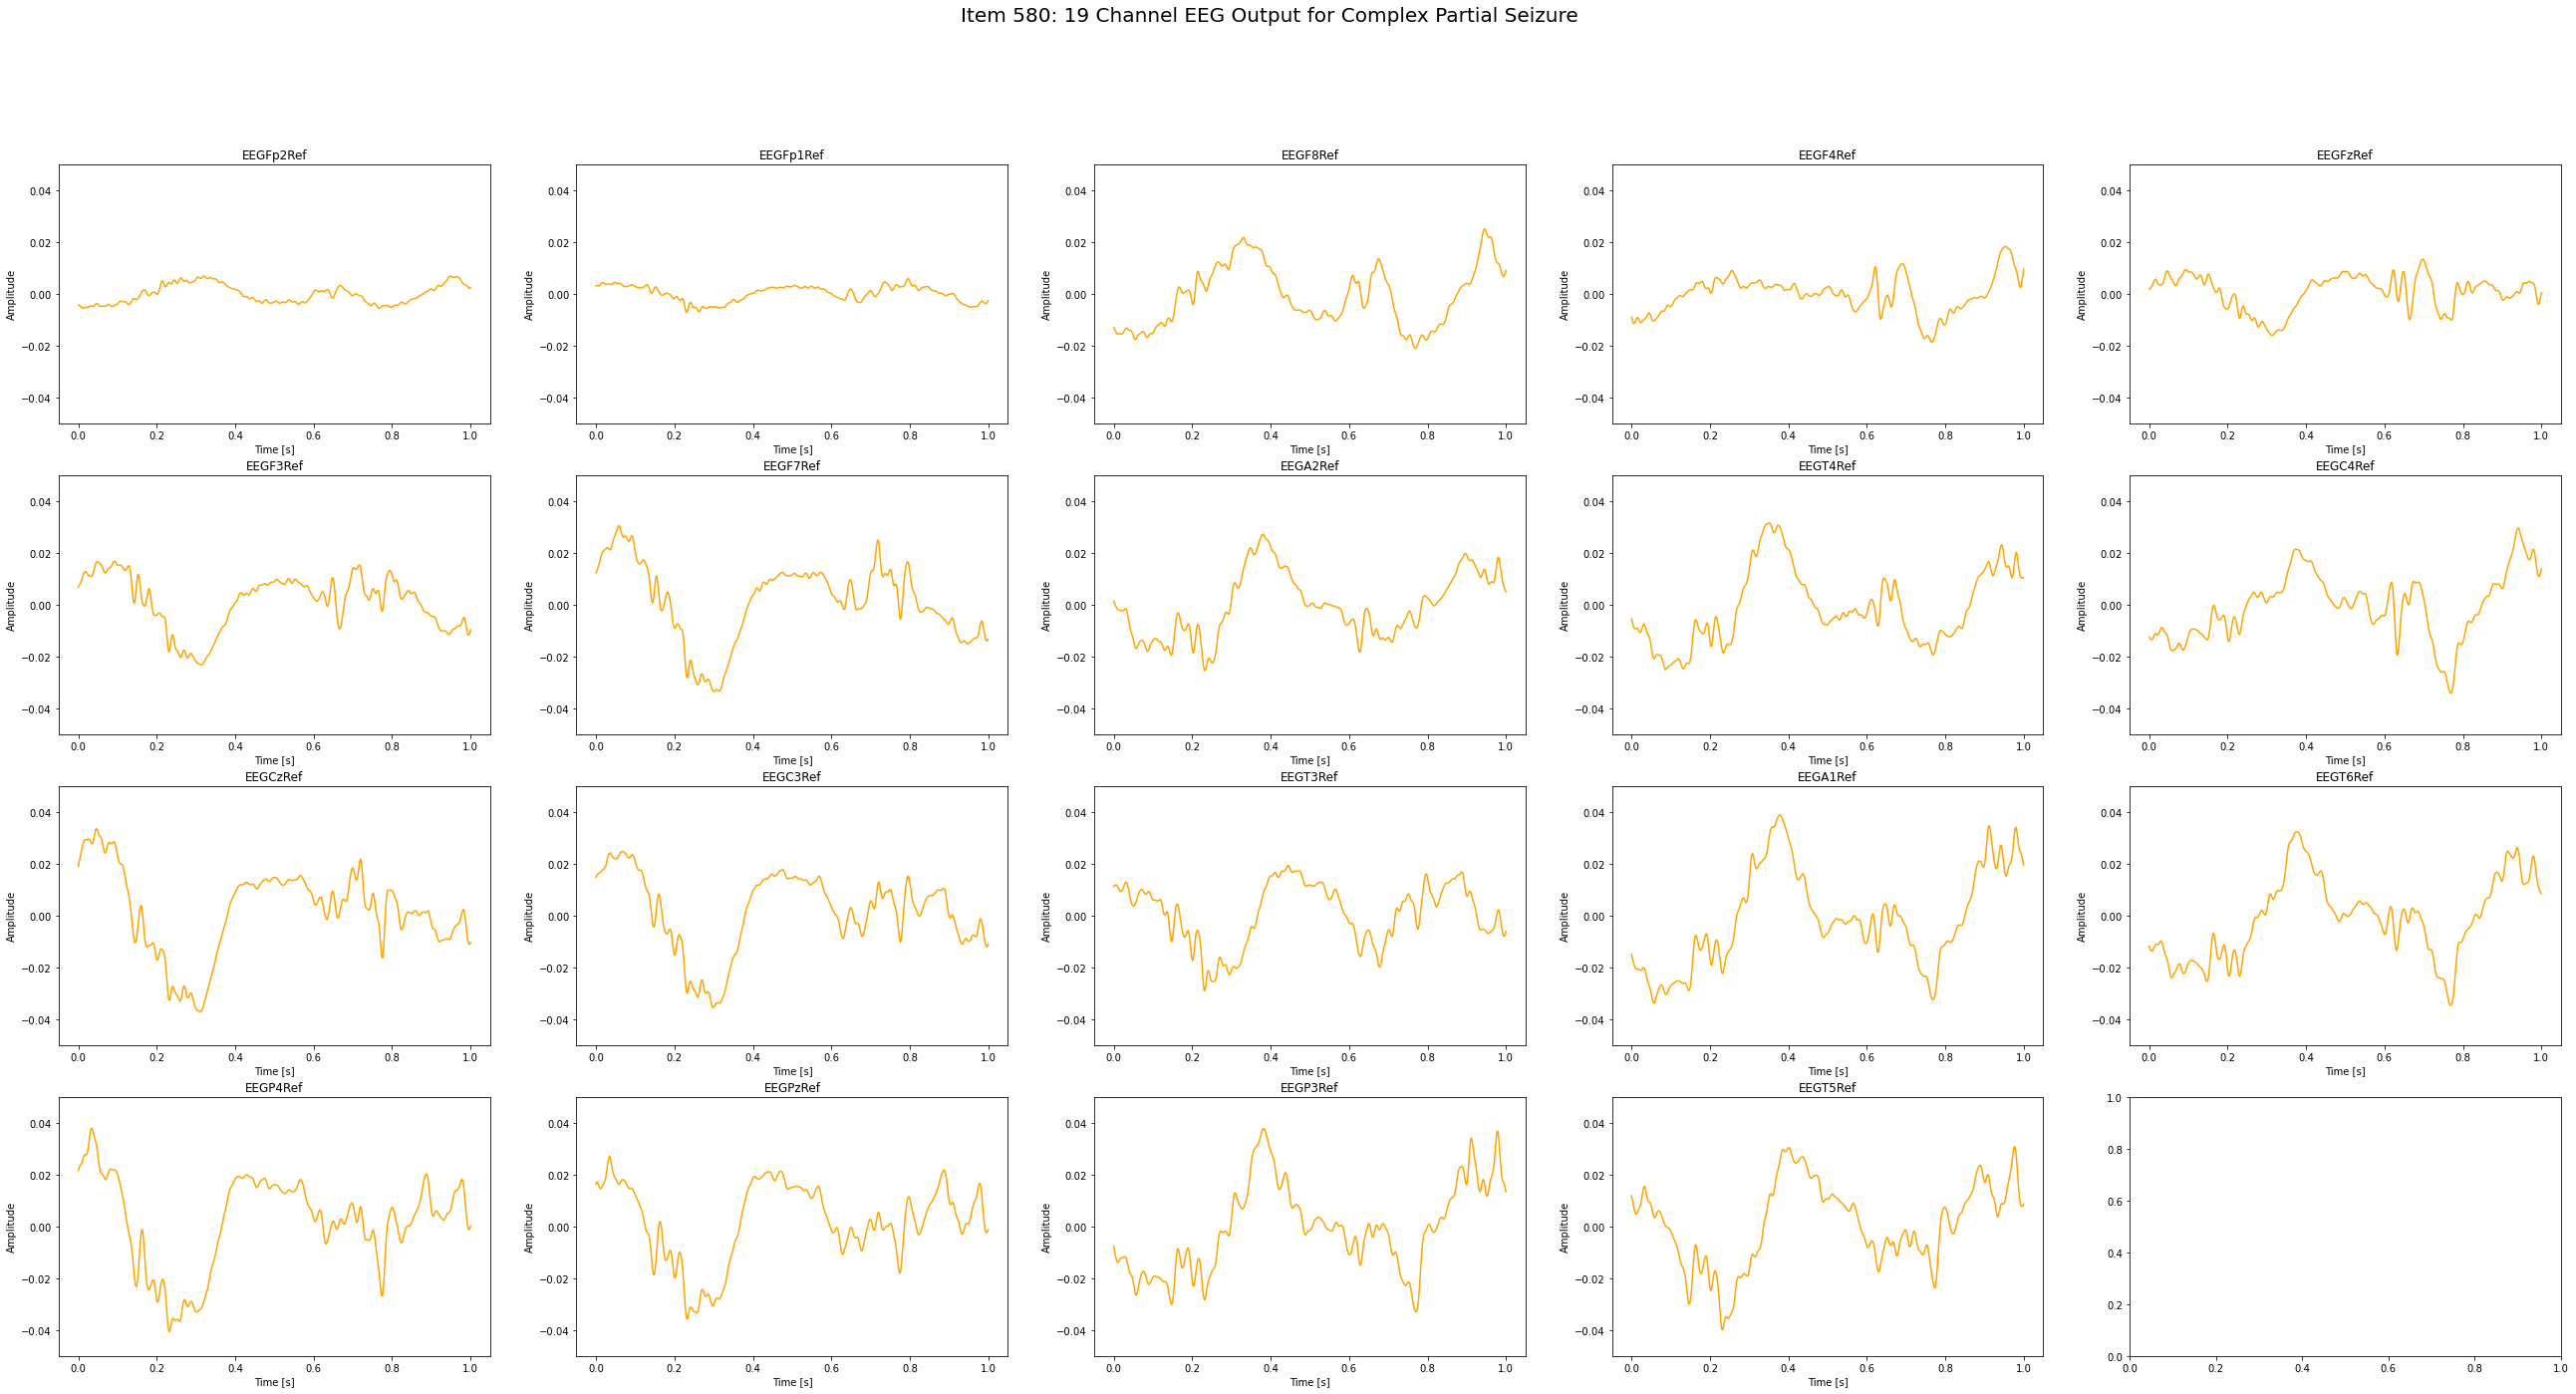

In [365]:
idx = 580
names = ['EEGFp2Ref', 'EEGFp1Ref', 'EEGF8Ref', 'EEGF4Ref', 'EEGFzRef', 'EEGF3Ref', 'EEGF7Ref', 'EEGA2Ref', 'EEGT4Ref', 'EEGC4Ref', 'EEGCzRef', 'EEGC3Ref', 'EEGT3Ref', 'EEGA1Ref', 'EEGT6Ref', 'EEGP4Ref', 'EEGPzRef', 'EEGP3Ref', 'EEGT5Ref', 'EEGO2Ref', 'EEGO1Ref', 'ECGEKG', 'Manual', 'EDFAnnotations']

electrode_ref = {i: names[i] for i in range(len(names))}
search_key = {1: [], 2: [], 0: []}
for x, i in enumerate(Y):
    try:
        search_key[i].append(x)
    except:
        pass
        # print(f"{x} is not found")
# print(search_key)

fig, axs = plt.subplots(int(len(names)/6), 5, figsize=(45, 22))
fig.suptitle( f"Item {idx}: 19 Channel EEG Output for {key[Y[idx]]}", fontsize=20)

idx_pairs = [(i, x) for i in range(6) for x in range(5)]
# print(idx_pairs)
print(search_key)

t_check = np.linspace(0, 1, 500)
for i in range(len(names)):
    axs[idx_pairs[i][0], idx_pairs[i][1]].plot(t_check, X[idx][i], 'orange')
    axs[idx_pairs[i][0], idx_pairs[i][1]].set_title(names[i])
    axs[idx_pairs[i][0], idx_pairs[i][1]].set(xlabel="Time [s]", ylabel="Amplitude")
    axs[idx_pairs[i][0], idx_pairs[i][1]].set_ylim([-0.05, 0.05])
    # axs.set(ylabel=names[i])
# plt.plot(t, X[idx][18])
# print(key[Y[idx]])